In [1]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt

In [2]:
attr = pd.read_csv('./Desktop/MISP/attributes_v5.csv', index_col='id')
print(attr.index)

Int64Index([58208925, 58208926, 58208927, 58208928, 58208913, 58208914,
            58208915, 58208916, 58208917, 58207122,
            ...
            57320239, 57320240, 57320241, 57320242, 57320243, 57320244,
            57320245, 57320246, 57320247, 57320248],
           dtype='int64', name='id', length=443253)


C:\Users\chun\AppData\Local\Temp\ipykernel_24264\3696103016.py:1: DtypeWarning: Columns (5,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  attr = pd.read_csv('./Desktop/MISP/attributes_v5.csv', index_col='id')


In [3]:
print(attr[attr.duplicated()])
##attr[attr.duplicated()].to_csv('./Desktop/MISP/attributes_duplicated.csv', mode='a+')

Empty DataFrame
Columns: [event_id, category, type, value1, value2, to_ids, uuid, timestamp, distribution, comment, sharing_group_id, deleted, disable_correlation, object_id, object_relation, first_seen, last_seen, value]
Index: []


In [4]:
attr = attr[~attr.duplicated(keep='first')]
print(attr)
##attr.to_csv('./Desktop/MISP/attributes_v5.csv', index=False, mode='w', header=None)

          event_id          category           type  \
id                                                    
58208925    179670  Payload delivery  email-subject   
58208926    179670  Payload delivery      email-src   
58208927    179670  Network activity         domain   
58208928    179670  Payload delivery            url   
58208913    179669  Payload delivery  email-subject   
...            ...               ...            ...   
57320244    178900  Payload delivery         sha256   
57320245    178900  Payload delivery         sha256   
57320246    178900  Payload delivery         sha256   
57320247    178900  Payload delivery         sha256   
57320248    178900  Payload delivery         sha256   

                                                     value1 value2  to_ids  \
id                                                                           
58208925       Tekstielreiniging St Jozef klant id : 284352    NaN   False   
58208926     cd015b3c-726a-46f5-92b0-4142eaeba997@

In [5]:
## useless
attr_type = attr.groupby('event_id',as_index=False)
print(attr_type)

In [6]:
def createLabels(data):                   # 自定義函數，為引用plusone團隊
    for item in data:
        height = item.get_height()
        plt.text(
            item.get_x()+item.get_width()/2., 
            height+10, 
            '%d' % int(height),
            ha = "center",
            va = "bottom",
        )

type
attachment             58
authentihash            1
comment                27
datetime              356
domain               6844
email-dst               4
email-src              31
email-subject          11
filename              980
filename|sha1           4
filename|sha256         4
float                   1
hostname               40
hostname|port           1
imphash               506
ip-dst                201
ip-dst|port         37395
ip-src                143
link                  496
malware-sample         14
malware-type            1
md5                  2294
mime-type             930
pdb                     3
port                 1038
sha1                 1139
sha256             310369
sha3-384              929
sha512                  3
sigma                   1
size-in-bytes         945
snort                  11
ssdeep                931
text                 1683
threat-actor            3
tlsh                  929
url                 74916
user-agent              1
vhash  

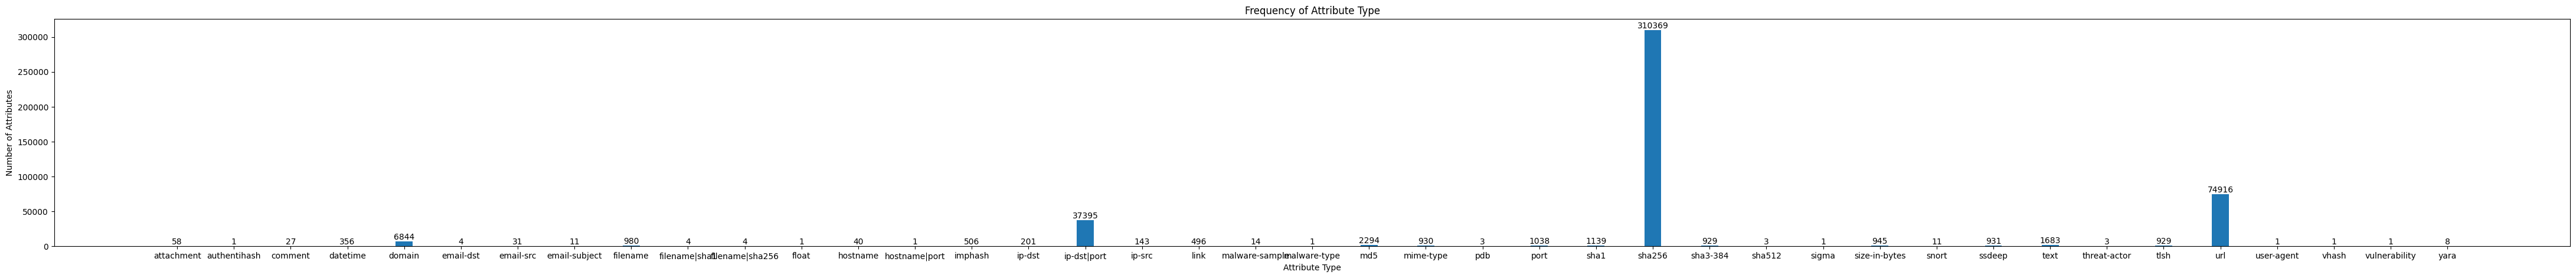

In [7]:
attr_type = attr.value_counts("type",sort=False)
print(attr_type)

fig = plt.figure(figsize=(55,5))
x=np.arange(attr_type.size)                     #產生X軸座標序列
A = plt.bar(x, attr_type.values, width=0.3)     #繪製長條圖
createLabels(A)    
plt.xticks(x ,attr_type.index)
plt.title('Frequency of Attribute Type')          #設定圖形標題
plt.xlabel('Attribute Type')                               #設定X軸標籤
plt.ylabel('Number of Attributes')                          #設定Y軸標籤
plt.show()



category
Artifacts dropped          949
Attribution                  3
External analysis          598
Network activity         69160
Other                     2971
Payload delivery        369562
Payload installation        10
dtype: int64


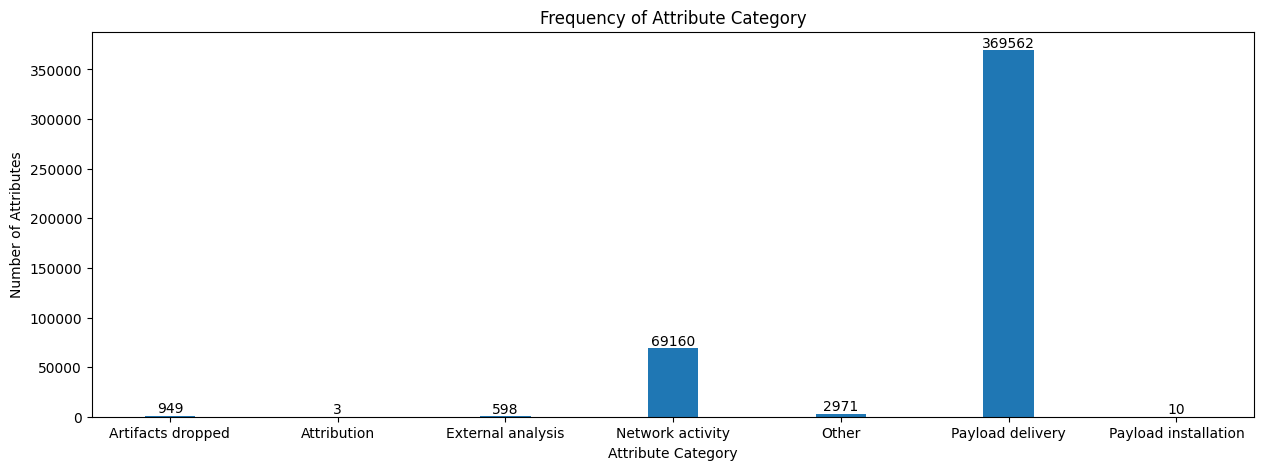

In [8]:
attr_category = attr.value_counts("category",sort=False)
print(attr_category)

fig = plt.figure(figsize=(15,5))
x=np.arange(attr_category.size)                     #產生X軸座標序列
A = plt.bar(x, attr_category.values, width=0.3)     #繪製長條圖
createLabels(A)    
plt.xticks(x ,attr_category.index)
plt.title('Frequency of Attribute Category')          #設定圖形標題
plt.xlabel('Attribute Category')                               #設定X軸標籤
plt.ylabel('Number of Attributes')                          #設定Y軸標籤
plt.show()


In [9]:
attr_eventid = attr.value_counts("event_id",sort=False)
print(attr_eventid.index)
index = attr_eventid.index

Int64Index([178900, 178901, 178902, 178903, 178904, 178905, 178906, 178907,
            178908, 178909,
            ...
            179690, 179691, 179692, 179693, 179694, 179695, 179696, 179697,
            179698, 179699],
           dtype='int64', name='event_id', length=768)


In [10]:
def get_events(api_url, misp_key, event_id):
    headers = {
        'Accept': 'application/json',
        'Content-Type': 'application/json',
        'Authorization': misp_key
    }

    response = requests.get(api_url + f"{event_id}", headers=headers)
    
    while response.status_code != 200:
        print(f"Error: {response.status_code} - {response.text}")
        print(f"Resend request of event {event_id}.")
        response = requests.get(api_url + f"{event_id}", headers=headers)

    if response.status_code == 200:
        attributes = response.json()
        return attributes
    else:
        print(f"Error: {response.status_code} - {response.text}")
        return None

In [11]:
api_url = 'https://misppriv.circl.lu/events/'  # Replace with your API endpoint
misp_key = 'UoF5rqhWcuO6KYLrpk5QoAvU10lRrD8K1IGPPtb4'  # Replace with your actual API token

for i in range(len(index)):
    print(index[i])
    event = get_events(api_url, misp_key, index[i])
    event = pd.DataFrame(event).set_index('id')
    new_attr.to_csv('./Desktop/MISP/events.csv', mode='a+', header=False)
    print(event.index)

178900


KeyError: "None of ['id'] are in the columns"